<a href="https://colab.research.google.com/github/KhushiChaudhary03/Review-Intelligence-Clustering-Analysis-of-Retail-Feedback/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Review Intelligence: Clustering & Analysis of Retail Feedback**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **By** - Khushi

# **Project Summary -**

This project focuses on leveraging unsupervised machine learning techniques, specifically K-Means and Agglomerative Hierarchical Clustering, to derive insights from unstructured textual data found in an online retail dataset. In today’s data-driven retail environment, understanding customer behavior and product patterns is essential, especially when large portions of data exist in the form of free-text descriptions. The primary goal of this project is to process, structure, and analyze such text data—mainly product descriptions—to identify meaningful product groupings and hidden patterns that can support business decisions in marketing, inventory management, and customer engagement strategies.

The dataset used in this project is based on real-world retail transactions and includes columns such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country. The analysis concentrated mainly on the “Description” column, which includes detailed product names or descriptions written in free text. Since this raw text cannot be directly used for modeling, several natural language processing (NLP) steps were applied to prepare the data for clustering.

First, the data was cleaned by removing null values, duplicates, and irrelevant entries. The text processing phase involved expanding contractions (e.g., "isn't" to "is not"), converting all characters to lowercase to ensure uniformity, removing punctuation, numbers, and special characters, and eliminating stopwords (commonly used words like “the” or “and” that do not add meaning). After text normalization, tokenization and whitespace stripping were done to ensure clean word-level representation.

Next, the processed text was vectorized using the Term Frequency-Inverse Document Frequency (TF-IDF) method, which assigns weights to words based on their frequency in a document relative to the entire corpus. The result was a high-dimensional sparse matrix representing each product description numerically. However, to make the data more suitable for clustering and to reduce computational load, dimensionality reduction was performed using Truncated Singular Value Decomposition (SVD). Based on the explained variance curve, 30 components were selected, which retained sufficient information while making the data manageable.

To find natural groupings in the data, the K-Means clustering algorithm was applied. The optimal number of clusters was determined using the Elbow Method and Silhouette Score analysis. A silhouette score of around 0.14 indicated moderate clustering quality, and based on these analyses, seven clusters were chosen. Each cluster represents a group of similar products based on their textual descriptions.

For comparison, Agglomerative Hierarchical Clustering was also performed using Ward linkage and Euclidean distance. A dendrogram was plotted to visualize the hierarchical relationships between descriptions, but due to memory limitations, clustering was conducted on the SVD-reduced dataset rather than the full TF-IDF matrix.

To interpret the clusters, word clouds were generated for each group, showing the most frequently occurring terms. These visualizations provided insight into the nature of each cluster—for example, one cluster consisted mostly of gift items, another of kitchenware, and yet another of holiday-themed products. This helped in understanding customer interests and product trends.

Overall, this project demonstrates how unstructured text data from retail systems can be transformed into actionable insights through preprocessing, vectorization, dimensionality reduction, and clustering. The clustering results can help businesses optimize their marketing strategies, organize products better, and improve the customer shopping experience. By grouping similar items, businesses can also create effective product bundles and streamline their inventory planning. This project highlights the power of combining machine learning with natural language processing to unlock the value hidden in textual data.

# **GitHub Link -**

https://github.com/KhushiChaudhary03/Review-Intelligence-Clustering-Analysis-of-Retail-Feedback.git

# **Problem Statement**


**Retail datasets often contain large volumes of unstructured textual data, particularly in product descriptions, which are difficult to analyze using traditional methods. The challenge lies in extracting meaningful insights and patterns from this unstructured text to support better product organization, customer understanding, and business strategy. This project aims to apply clustering techniques on product descriptions to identify natural groupings of items and uncover hidden trends within an online retail dataset.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
import scipy.cluster.hierarchy as sch
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Copy of Online Retail.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Number of unique customer IDS
df['CustomerID'].nunique()

4372

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

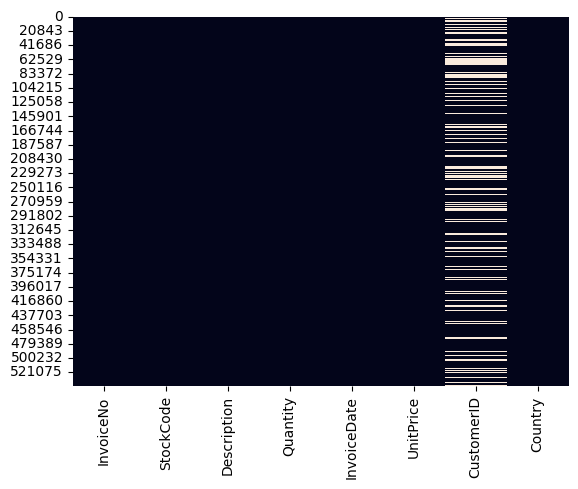

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

There are 541909 rows and 8 columns.

The count of duplicated rows is 5268.

Description	column has 1454 missing values.

CustomerID	column has 135080 ,issing values.



## ***2. Understanding Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

### Variables Description

InvoiceNo	:  A 6-digit number uniquely identifying each transaction. Invoices starting with 'C' indicate cancellations or returns.

StockCode : 	Product/item code, a unique identifier for each product.

Description :	Product name or item description.

Quantity :	The number of units of the product purchased per transaction. Negative values indicate returns.

InvoiceDate :	The date and time when the transaction occurred. Useful for time-based analysis.

UnitPrice :	Price per unit of the product (in Pounds Sterling).

CustomerID	: Unique identifier for each customer. Missing values often indicate guest or unknown customers.

Country :	Name of the country where the customer resides. Mostly United Kingdom, but includes international customers.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Removing missing values
df.dropna(subset=['CustomerID', 'Description'])



InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[406829 rows x 8 columns]

In [ ]:
df = df.groupby(['InvoiceNo', 'StockCode'], as_index=False).agg({
    'Quantity': 'sum',
    'UnitPrice': 'first',
    'Description': 'first',
    'InvoiceDate': 'first',
    'CustomerID': 'first',
    'Country': 'first'
})


In [ ]:
df = df.drop_duplicates()

In [ ]:
df = df[df['Quantity'] > 0]  # remove returns

In [ ]:
df = df[df['UnitPrice'] > 0]

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Total revenue per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Extract date parts
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour


In [ ]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [ ]:
df['Description'] = df['Description'].str.strip().str.lower()
df['Country'] = df['Country'].str.strip()

Dropped missing values using dropna() to ensure consistency, especially in critical columns like Description and CustomerID.

Removed duplicates using drop_duplicates() to avoid skewing analysis with repeated transactions.

Converted the InvoiceDate column to datetime format, allowing for efficient time-based feature extraction.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

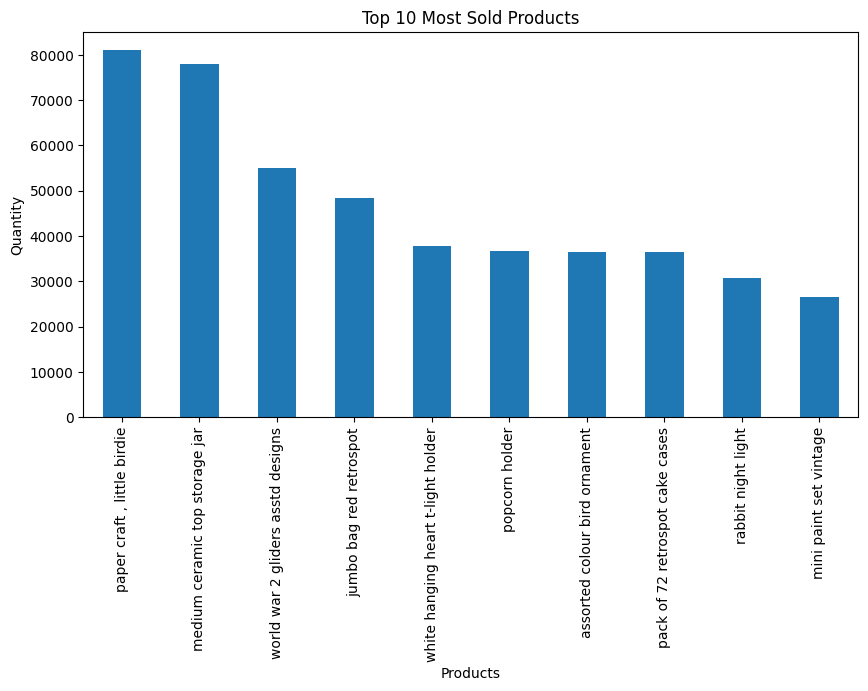

In [ ]:
# Chart - 1 visualization code
#Top selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), title='Top 10 Most Sold Products')
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

Top Product:

"paper craft, little birdie" is the most sold product with a quantity exceeding 80,000 units, making it a clear bestseller.

Other High Performers:

Products like "medium ceramic top storage jar" and "world war 2 gliders assd designs" also have very high sales volumes.

These could be key revenue drivers for the business.

Product Categories:

Most top-selling items appear to be decorative or household items, such as storage jars, lighting, ornaments, and bags.

This reflects strong customer demand for home decor and gift items.

Sales Volume Distribution:

The top two products are significantly ahead of the rest, suggesting they are standout performers.

The remaining products have relatively similar sales figures, indicating moderate but steady demand.

Inventory Strategy Implications:

These insights can help in stock optimization, ensuring that the best-selling items are always available.

Retailers could also consider bundling slower-moving items with popular ones to drive more sales.

#### Chart - 2

<Axes: title={'center': 'Sales by Country'}, xlabel='Country'>

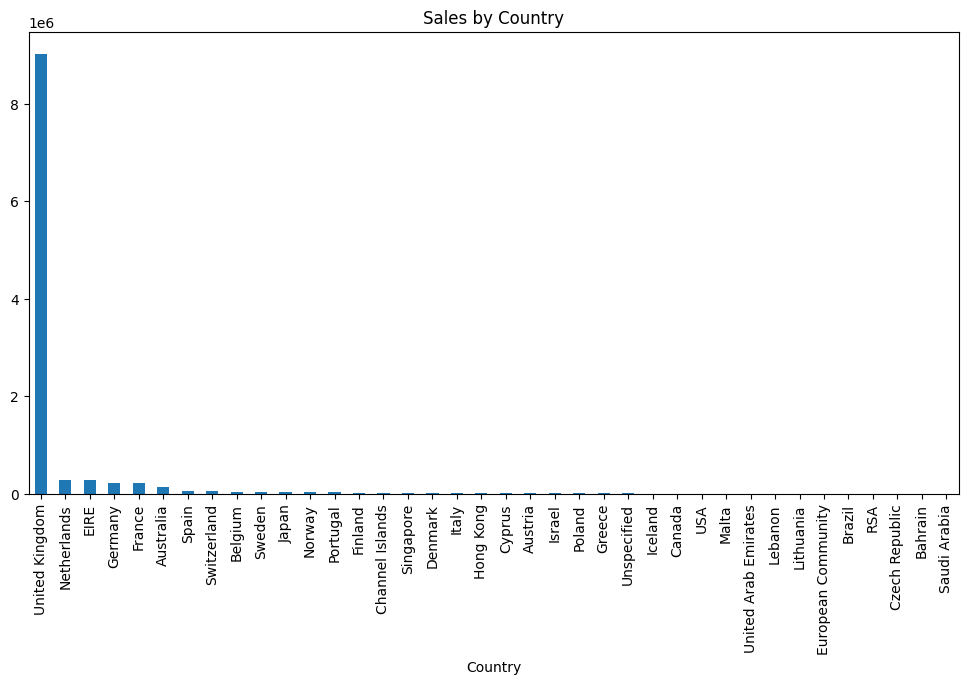

In [ ]:
# Chart - 2 visualization code
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', figsize=(12,6), title='Sales by Country')


United Kingdom is having most number of sales.

#### Chart - 3

<Axes: title={'center': 'Daily Revenue Trend'}, xlabel='InvoiceDate', ylabel='Revenue (£)'>

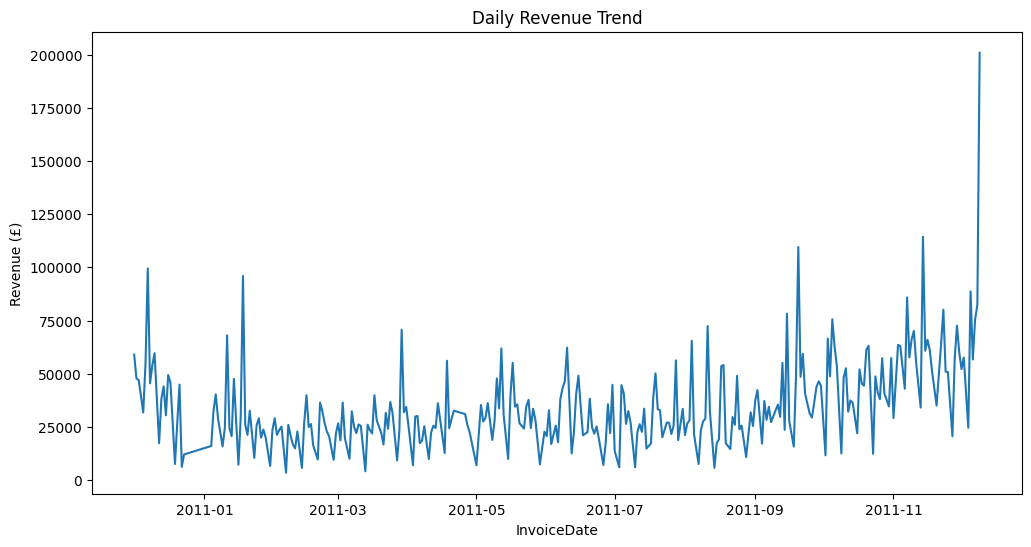

In [ ]:
# Chart - 3 visualization code
#Daily sales trends
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
daily_sales.plot(figsize=(12,6), title='Daily Revenue Trend', ylabel='Revenue (£)')


This line plot shows the daily revenue trend over the year 2011. It highlights high volatility in daily sales, with noticeable spikes. There's a gradual upward trend in revenue towards the end of the year, peaking sharply in December—likely due to holiday season sales.

#### Chart - 4

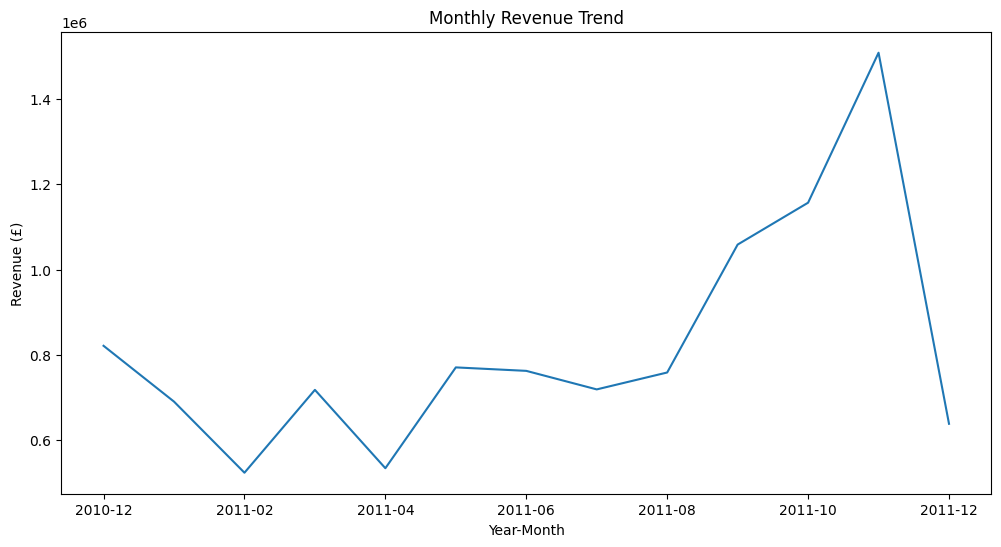

In [ ]:
# Chart - 4 visualization code
monthly_revenue = df.groupby(['InvoiceYear', 'InvoiceMonth'])['TotalPrice'].sum()
monthly_revenue.index = [f"{y}-{m:02}" for y, m in monthly_revenue.index]
monthly_revenue.plot(kind='line', figsize=(12,6), title='Monthly Revenue Trend', ylabel='Revenue (£)', xlabel='Year-Month')
plt.show()

Montly sales is most in the month of november.

#### Chart - 5

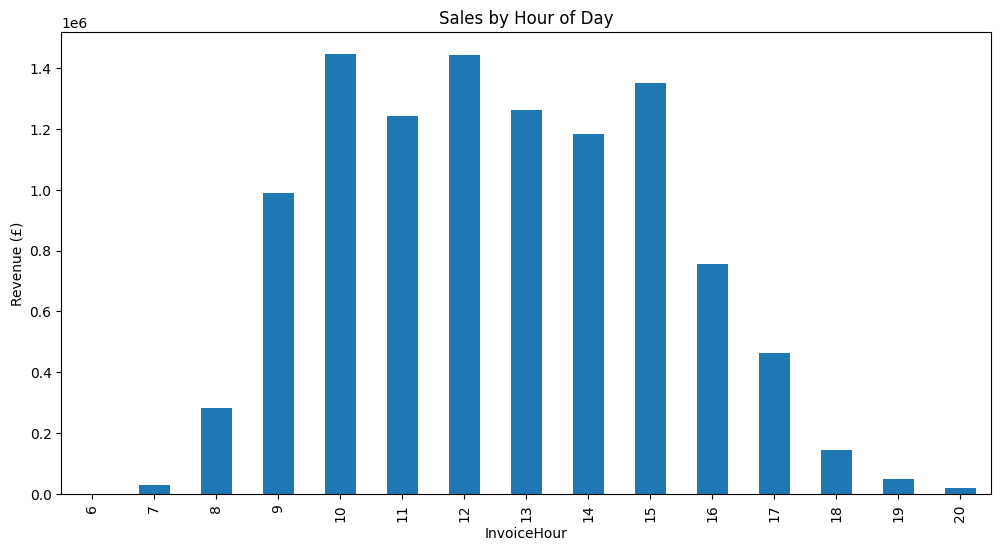

In [ ]:
# Chart - 5 visualization code
#Sales by Hour of Day
hourly_sales = df.groupby('InvoiceHour')['TotalPrice'].sum()
hourly_sales.plot(kind='bar', figsize=(12,6), title='Sales by Hour of Day', ylabel='Revenue (£)')
plt.show()

This bar chart shows sales revenue by hour of the day. The highest revenue occurs between 10 AM and 3 PM, with peaks at 10 AM and 12 PM, indicating these are the busiest hours for customer purchases. Sales drop sharply after 4 PM, with very low activity before 8 AM and after 6 PM. This suggests that the majority of transactions happen during typical business hours.

#### Chart - 6

<Axes: title={'center': 'Sales by Day of the Week'}, xlabel='Weekday', ylabel='Revenue (£)'>

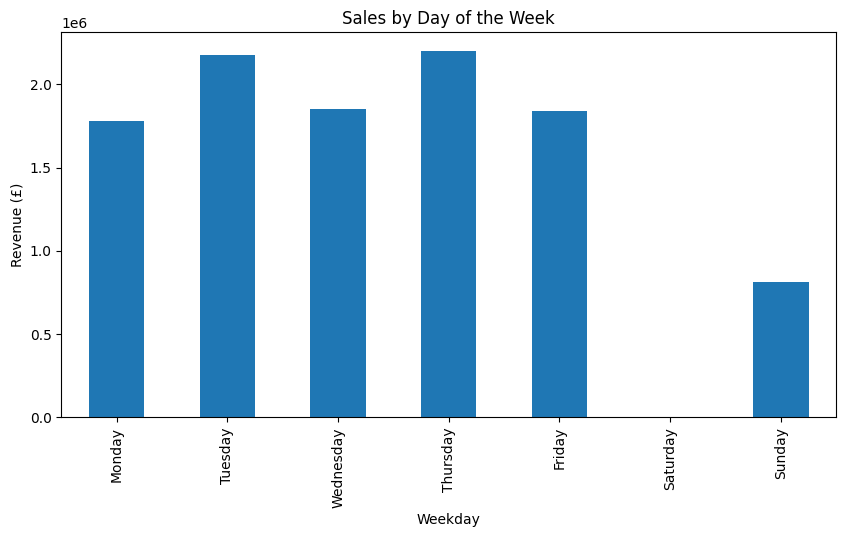

In [ ]:
# Chart - 6 visualization code
#Sales by Day of the Week
df['Weekday'] = df['InvoiceDate'].dt.day_name()
weekday_sales = df.groupby('Weekday')['TotalPrice'].sum()
weekday_sales = weekday_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales.plot(kind='bar', figsize=(10,5), title='Sales by Day of the Week', ylabel='Revenue (£)')


This bar chart illustrates sales revenue by day of the week. The highest sales occur on Thursday and Tuesday, followed closely by Wednesday and Friday. Monday sees slightly lower revenue, while Saturday shows no sales activity, and Sunday has significantly lower sales compared to weekdays. This indicates that the business is mostly active during weekdays, with peak performance mid-week, and very limited or no operations on weekends.

#### Chart - 7

<Axes: title={'center': 'Customer Spending Distribution'}, xlabel='Total Spend (£)', ylabel='Frequency'>

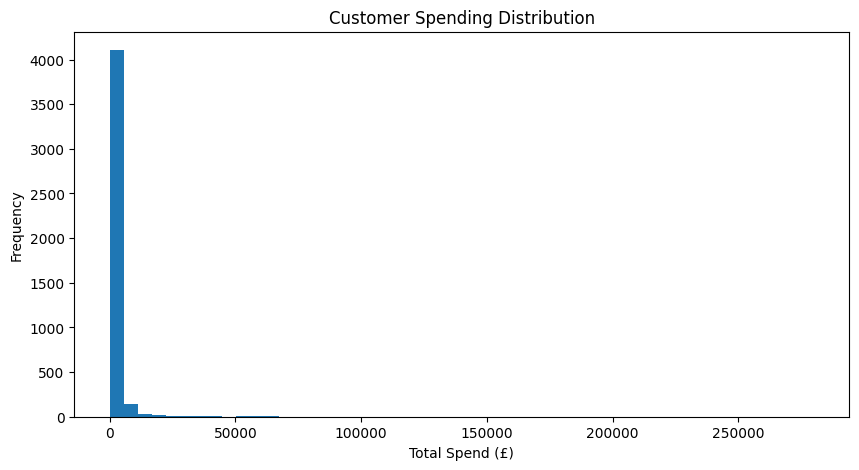

In [ ]:
# Chart - 7 visualization code
#Customer Spending Distribution
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()
customer_spending.plot(kind='hist', bins=50, figsize=(10,5), title='Customer Spending Distribution', xlabel='Total Spend (£)')


This histogram displays the distribution of total customer spending. The plot shows that most customers spend a relatively low amount, concentrated near the left end of the x-axis. A small number of customers have very high spending, forming a long right tail, indicating a right-skewed distribution. This suggests that while the business has many low-spending customers, a few high-value customers contribute disproportionately to overall revenue.

#### Chart - 8

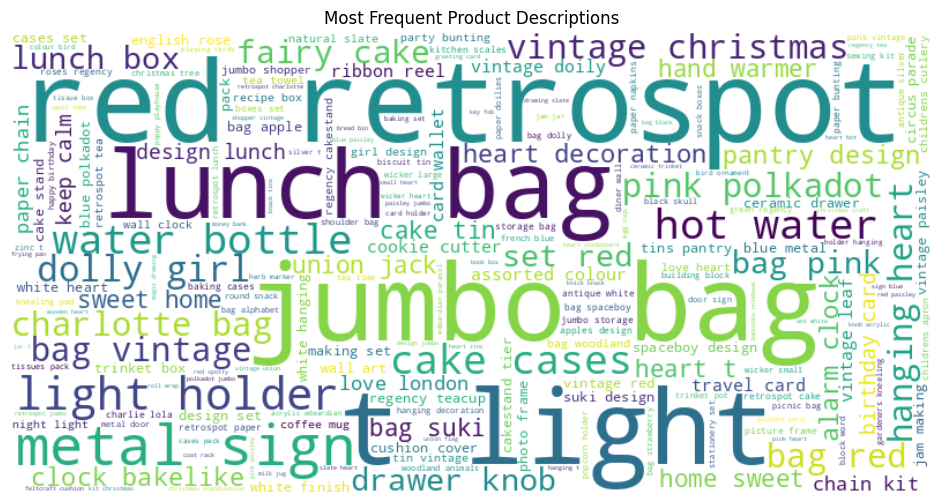

In [ ]:
# Chart - 8 visualization code
#Word Cloud of Product Names
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Description'].dropna().astype(str))
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Product Descriptions')
plt.show()


This word cloud represents the most frequent product descriptions in the dataset. Words like “red,” “retrospot,” “bag,” “lunch,” “light,” “jumbo,” and “bottle” appear prominently, indicating that these terms are commonly used in the product names. The larger and bolder the word, the more often it appears in product descriptions. This visualization helps identify popular themes or product categories, such as household items, bags, lights, and vintage-themed products, suggesting these are the most frequently sold or stocked products in the inventory.

## ***5. Feature Engineering & Data Pre-processing***

### Handling Outliers

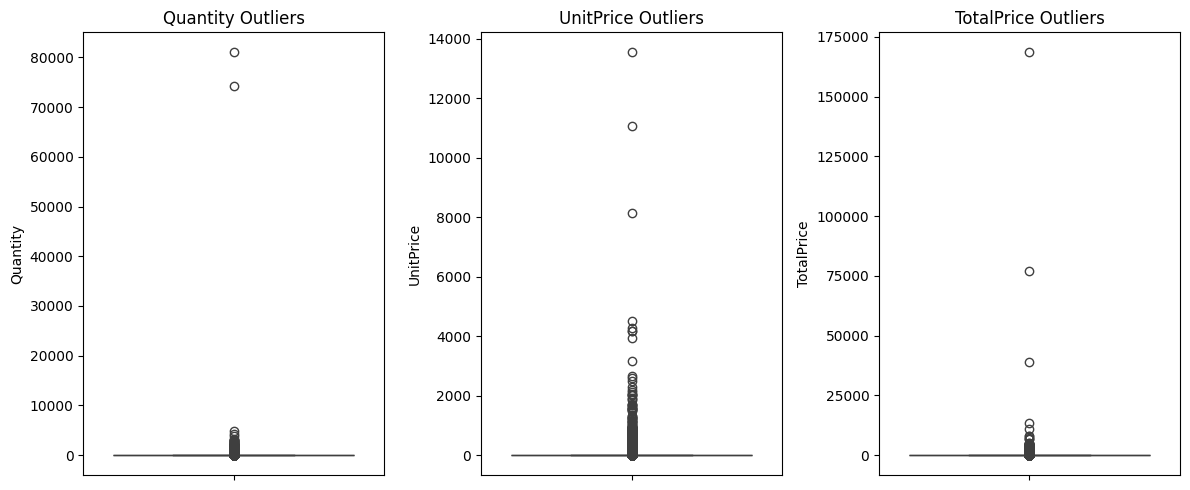

In [ ]:
# Handling Outliers & Outlier treatments
# Boxplots
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
sns.boxplot(y=df['Quantity'])
plt.title('Quantity Outliers')

plt.subplot(1,3,2)
sns.boxplot(y=df['UnitPrice'])
plt.title('UnitPrice Outliers')

plt.subplot(1,3,3)
sns.boxplot(y=df['TotalPrice'])
plt.title('TotalPrice Outliers')
plt.tight_layout()
plt.show()

In [ ]:
# Function to filter outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers
df = remove_outliers_iqr(df, 'Quantity')
df = remove_outliers_iqr(df, 'UnitPrice')
df = remove_outliers_iqr(df, 'TotalPrice')


#### **Textual Data Preprocessing**


###**Text cleaning**

In [ ]:
#text cleaning function
import re
def clean_text(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))

In [ ]:
# Applying above function on our combined column
df['Description'] = df['Description'].apply(clean_text)

In [ ]:
df['Description'] = df['Description'].str.lower()

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Stemming**

In [ ]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [ ]:
# defining a function to filter the words
def filter_words(string, filter_words):
  filtered=[]
  tokens = word_tokenize(string)
  for word in tokens:
    if word not in filter_words:
      filtered.append(stemmer.stem(word))
  return filtered

df['cleaned_text']= ''
for item, row in df.iterrows():
  df.at[item,'cleaned_text'] = filter_words(row['Description'],stop_words)

df['cleaned_text']

0           [glass, star, frost, tlight, holder]
1                     [set, babushka, nest, box]
2                        [white, metal, lantern]
3             [red, woolli, hotti, white, heart]
4         [knit, union, flag, hot, water, bottl]
                           ...                  
522078            [alarm, clock, bakelik, ivori]
522079            [children, apron, dolli, girl]
522080          [children, cutleri, dolli, girl]
522081        [children, cutleri, circus, parad]
522082             [children, cutleri, spaceboy]
Name: cleaned_text, Length: 437498, dtype: object

In [ ]:
#join words fun
def join_words(x):
  return " ".join(x)

In [ ]:
#final column
df['cleaned_text'] = df['cleaned_text'].apply(join_words)

In [ ]:
words = df.cleaned_text
words

0          glass star frost tlight holder
1                   set babushka nest box
2                     white metal lantern
3            red woolli hotti white heart
4         knit union flag hot water bottl
                       ...               
522078          alarm clock bakelik ivori
522079          children apron dolli girl
522080        children cutleri dolli girl
522081      children cutleri circus parad
522082          children cutleri spaceboy
Name: cleaned_text, Length: 437498, dtype: object

#### **Using TF-IDF**

In [ ]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 1, max_features=15000)
X = t_vectorizer.fit_transform(words)

In [ ]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1744601 stored elements and shape (437498, 1736)>

#### Reducing dimensions using TruncatedSVD

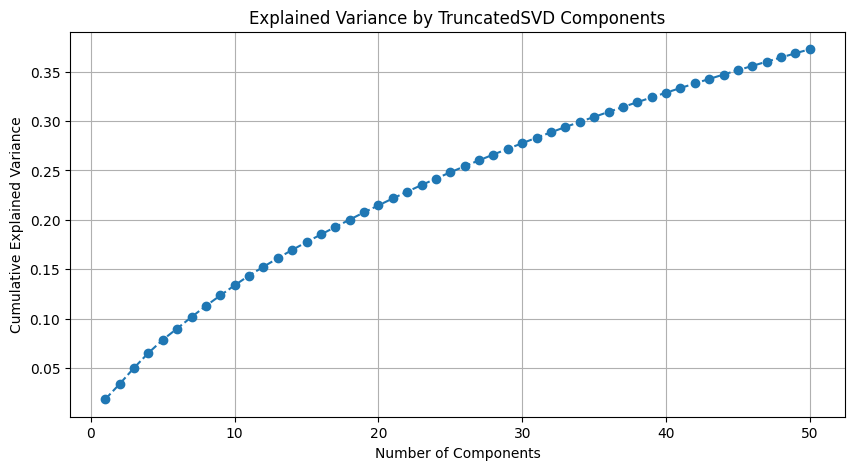

In [ ]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Replace PCA with TruncatedSVD for sparse TF-IDF input
svd = TruncatedSVD(n_components=50, random_state=42)
X_svd = svd.fit_transform(X)

# Plot explained variance
explained_var = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', linestyle='--')
plt.title('Explained Variance by TruncatedSVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


The number of components used are 30.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Use 100–300 components based on earlier explained variance plot
svd = TruncatedSVD(n_components=30, random_state=42)
X_transformed = svd.fit_transform(X)

print(X_transformed.shape)


(437498, 30)


In [ ]:
X_vectorized = t_vectorizer.transform(words)

In [ ]:
# Assuming X is the original TF-IDF matrix from cell wzpL-YF4tc_p
# And svd is the fitted TruncatedSVD object from cell y68mPCKKuV1N
X_reduced = svd.transform(X)
print(X_reduced.shape)

(437498, 30)


In [ ]:
X_reduced

array([[ 0.03080808,  0.23567925, -0.17402876, ...,  0.00308744,
        -0.05528656,  0.07482811],
       [ 0.07019875,  0.09834583,  0.06122698, ..., -0.00466034,
         0.01493591,  0.01236187],
       [ 0.02387165,  0.12278134, -0.09456283, ..., -0.05014507,
         0.04948396, -0.0263345 ],
       ...,
       [ 0.08110119, -0.00835557, -0.01203361, ..., -0.09069329,
         0.03384105,  0.05048274],
       [ 0.03265625,  0.00634671,  0.01171689, ..., -0.03791725,
         0.0113996 ,  0.09696792],
       [ 0.07920289, -0.00254593, -0.00362636, ..., -0.11115865,
         0.03408438,  0.15025685]])

#### **Cluster model Implementation**

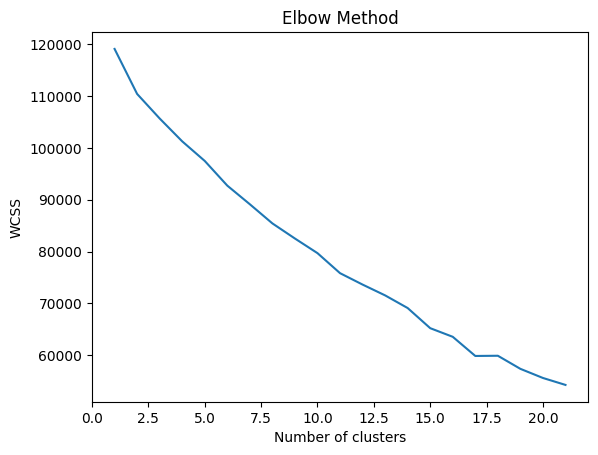

In [ ]:
# We will plot the graph to get the no. of clusters
wcss = []
for i in range(1, 22):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 22), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The number of clusters selected is 7.

#### **Dendogram**

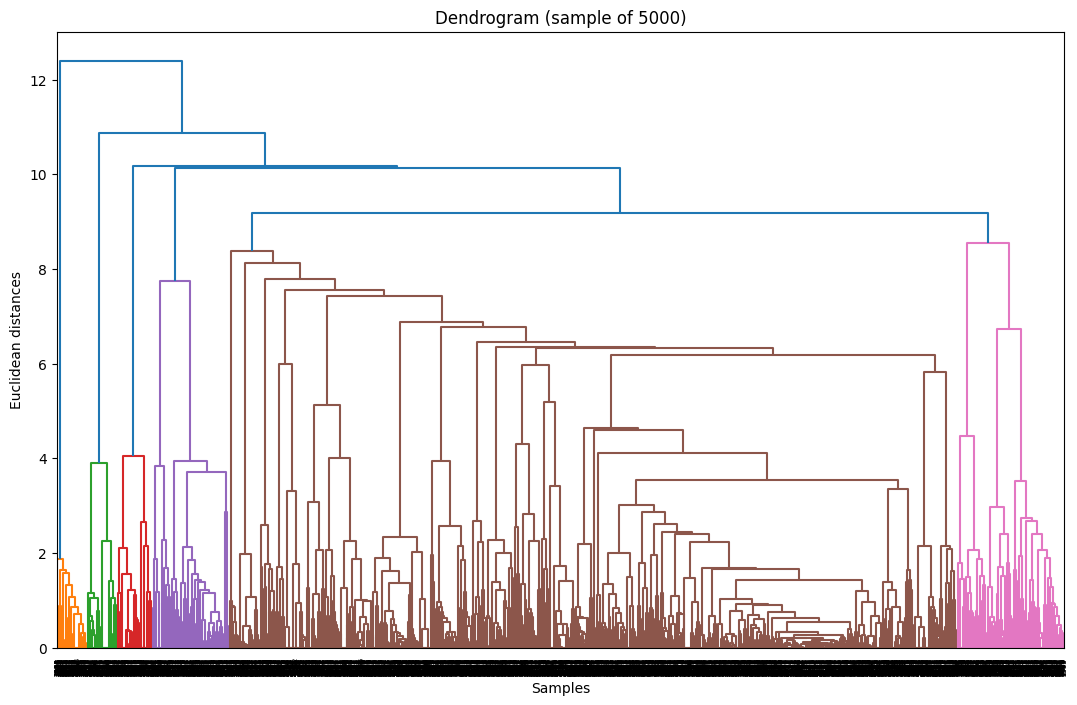

In [ ]:

sample_size = 5000
X_sample = X_reduced[:sample_size]

plt.figure(figsize=(13, 8))
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))
plt.title('Dendrogram (sample of 5000)')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

####**Agglomerative Clustering**

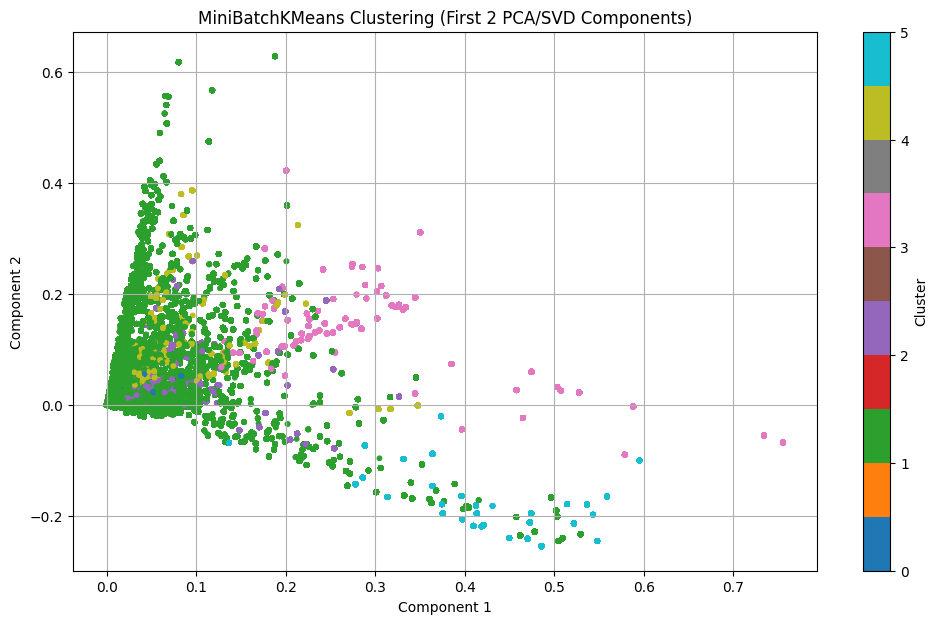

In [ ]:

from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

# Step 1: Clustering with MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=6, batch_size=2048, random_state=42)
y_kmeans = kmeans.fit_predict(X_reduced)

# Step 2: Visualizing Clusters (only first 2 components of reduced space)
plt.figure(figsize=(12, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_kmeans, cmap='tab10', s=10)
plt.title("MiniBatchKMeans Clustering (First 2 PCA/SVD Components)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


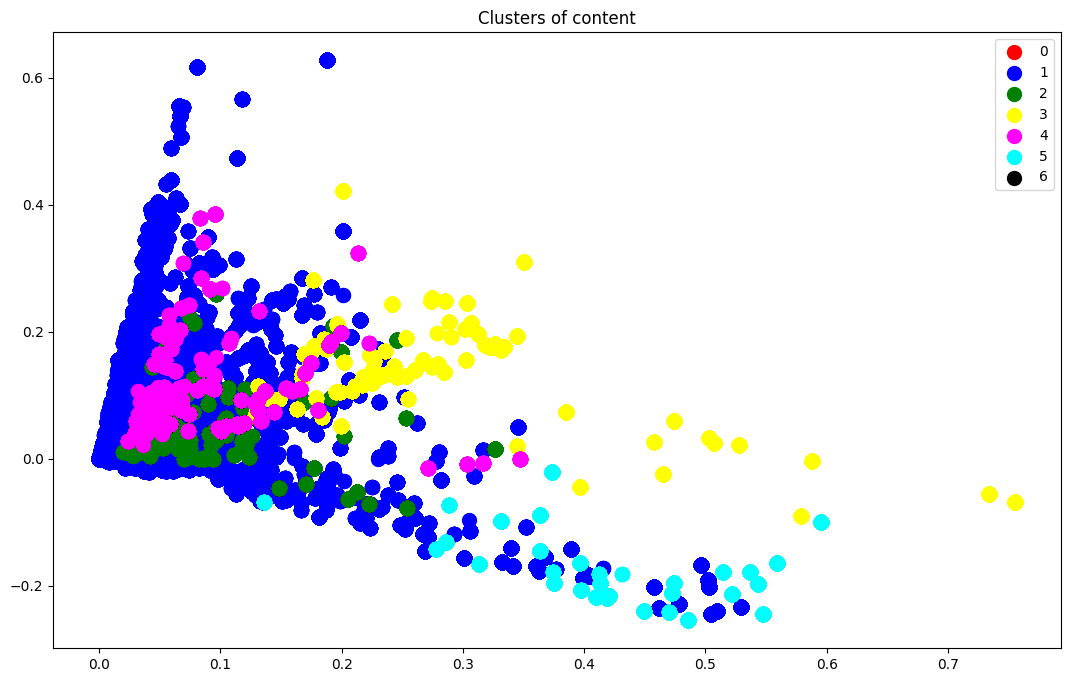

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X_reduced[y_kmeans == 0, 0], X_reduced[y_kmeans  == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(X_reduced[y_kmeans == 1, 0], X_reduced[y_kmeans  == 1, 1], s = 100, c = 'blue', label = '1')
plt.scatter(X_reduced[y_kmeans == 2, 0], X_reduced[y_kmeans  == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(X_reduced[y_kmeans == 3, 0], X_reduced[y_kmeans  == 3, 1], s = 100, c = 'yellow', label = '3')
plt.scatter(X_reduced[y_kmeans == 4, 0], X_reduced[y_kmeans  == 4, 1], s = 100, c = 'magenta', label = '4')
plt.scatter(X_reduced[y_kmeans  == 5, 0], X_reduced[y_kmeans  == 5, 1], s = 100, c = 'cyan', label = '5')
plt.scatter(X_reduced[y_kmeans  == 6, 0], X_reduced[y_kmeans  == 6, 1], s = 100, c = 'black', label = '6')


plt.title('Clusters of content')

plt.legend()
plt.show()

####**KMeans Clustering**

In [ ]:
# fitting the k means algorithm on lower features
kmeans= KMeans(n_clusters=7, init= 'k-means++',max_iter=300, n_init=1)
kmeans.fit(X_reduced)

KMeans(n_clusters=7, n_init=1)

In [ ]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient:  %0.3f"%silhouette_score(X_reduced , kmeans.labels_))

Silhouette Coefficient:  0.155


####**Predicting**

In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(X_reduced)

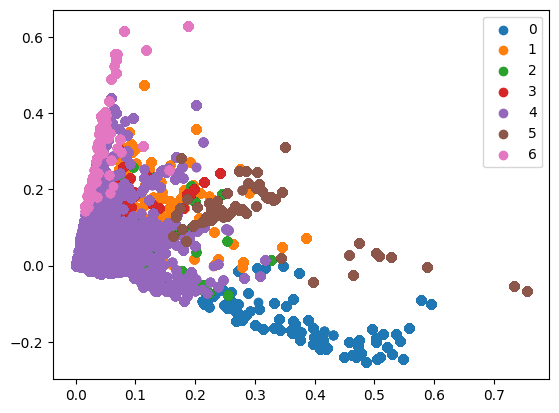

In [ ]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(X_reduced[label == i , 0] , X_reduced[label == i , 1] , label = i)
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

### **Assigning clusters to a new column**

In [ ]:
# Assigning clusters to our data
df['clusters'] = kmeans.labels_

In [ ]:
df.head(2)

InvoiceNo StockCode  Quantity  UnitPrice                       Description  \
0    536365     21730         6       4.25  glass star frosted tlight holder   
1    536365     22752         2       7.65       set  babushka nesting boxes   

          InvoiceDate  CustomerID         Country  TotalPrice  InvoiceYear  \
0 2010-12-01 08:26:00     17850.0  United Kingdom        25.5         2010   
1 2010-12-01 08:26:00     17850.0  United Kingdom        15.3         2010   

   InvoiceMonth  InvoiceDay  InvoiceHour    Weekday  \
0            12           1            8  Wednesday   
1            12           1            8  Wednesday   

                     cleaned_text  clusters  
0  glass star frost tlight holder         6  
1           set babushka nest box         2

###**Counting content in each cluster**

In [ ]:
# COunting content in each cluster
cluster_content_count = df['clusters'].value_counts().reset_index().rename(columns={'index':'clusters','clusters':'stocks'})
cluster_content_count

stocks   count
0       4  290661
1       1   45530
2       0   34776
3       2   22697
4       5   19489
5       6   12796
6       3   11549

####**Check all clusters**

In [ ]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_retail_wordclouds(data, cluster_col='clusters', text_cols=['cleaned_text']):
    stopwords = set(STOPWORDS)
    num_clusters = data[cluster_col].nunique()

    for cluster_id in range(num_clusters):
        print(f"\n🔍 Cluster {cluster_id} — Word Clouds")

        for col in text_cols:
            cluster_data = data[data[cluster_col] == cluster_id]
            text_data = cluster_data[col].dropna().astype(str)
            combined_text = " ".join(text_data)

            if combined_text.strip():
                wordcloud = WordCloud(stopwords=stopwords, background_color='black', width=800, height=400).generate(combined_text)
                plt.figure(figsize=(10, 5))
                plt.imshow(wordcloud, interpolation='bilinear')
                plt.axis("off")
                plt.title(f"Word Cloud for '{col}' - Cluster {cluster_id}")
                plt.show()
            else:
                print(f"No text found in column '{col}' for Cluster {cluster_id}")


Analysis of clusters


🔍 Cluster 0 — Word Clouds


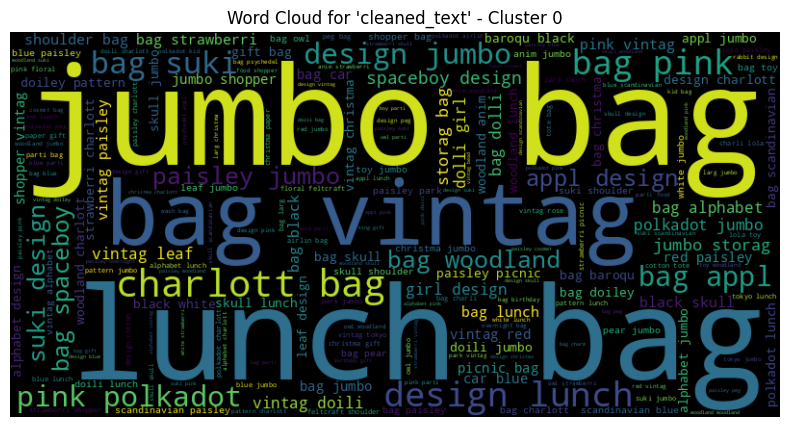

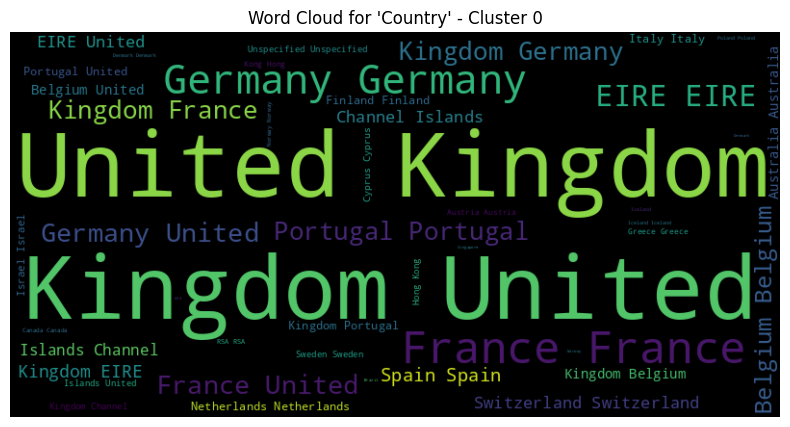


🔍 Cluster 1 — Word Clouds


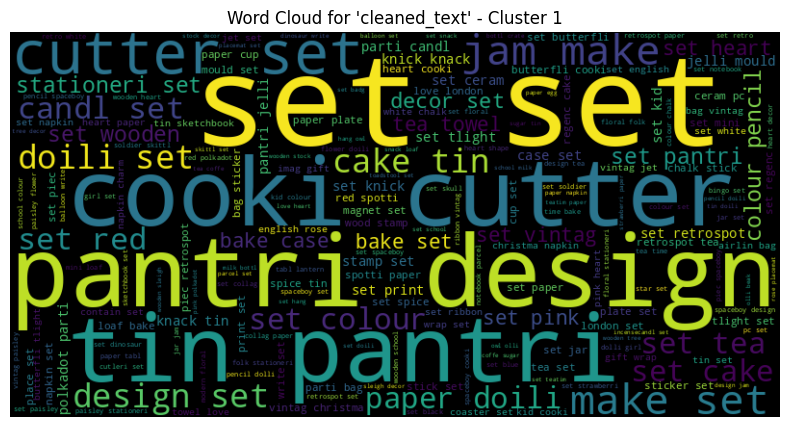

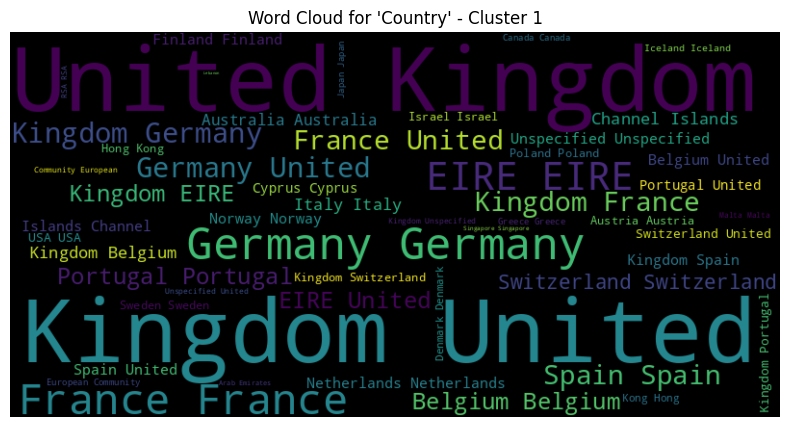


🔍 Cluster 2 — Word Clouds


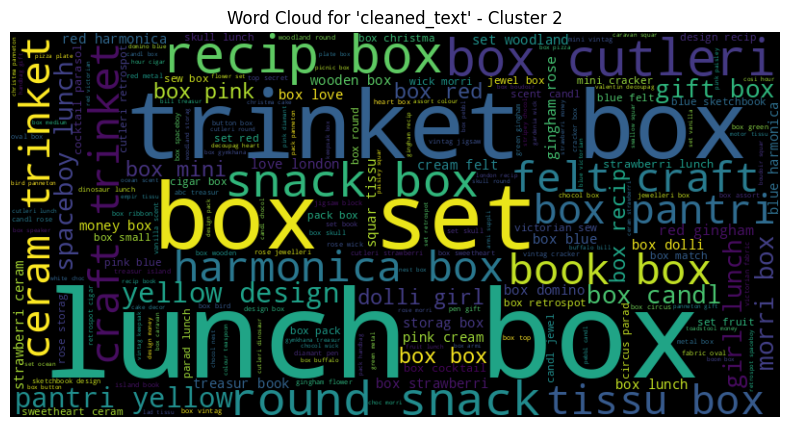

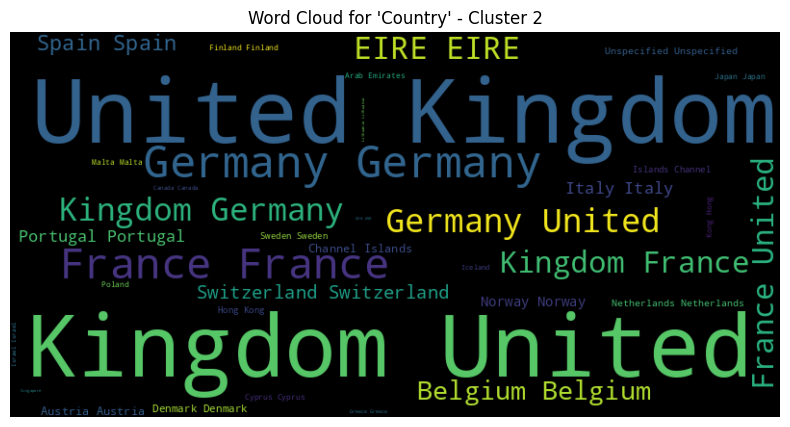


🔍 Cluster 3 — Word Clouds


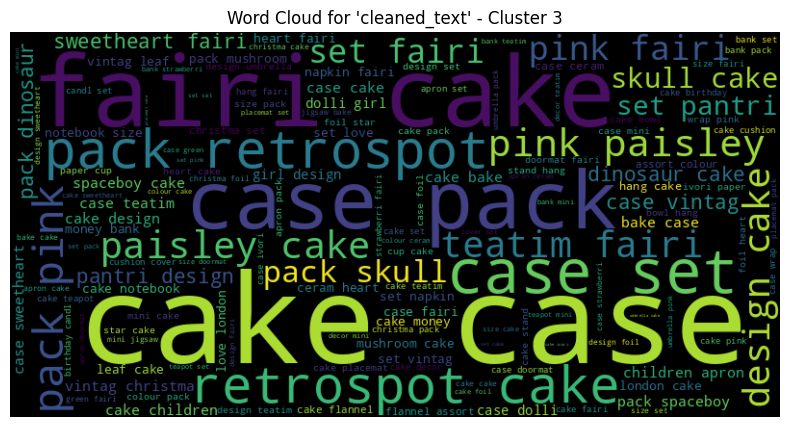

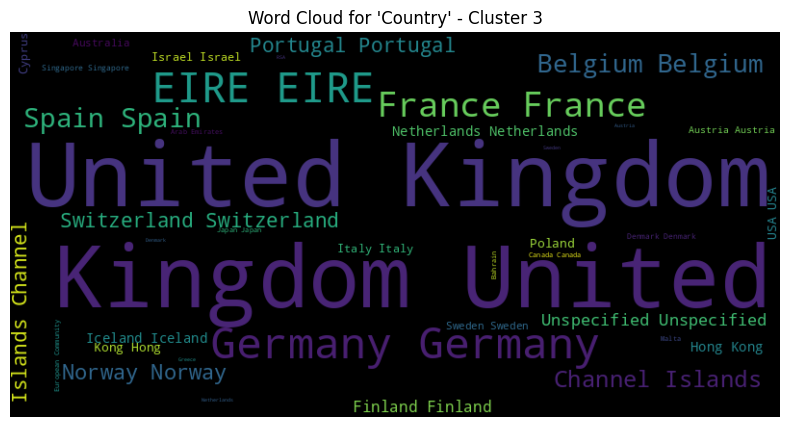


🔍 Cluster 4 — Word Clouds


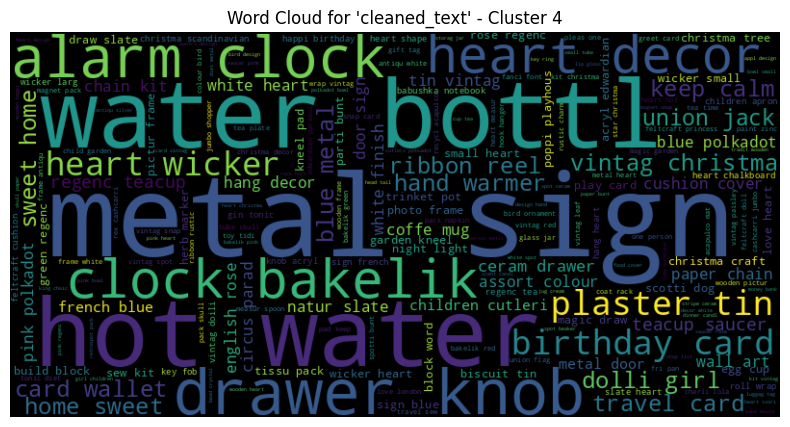

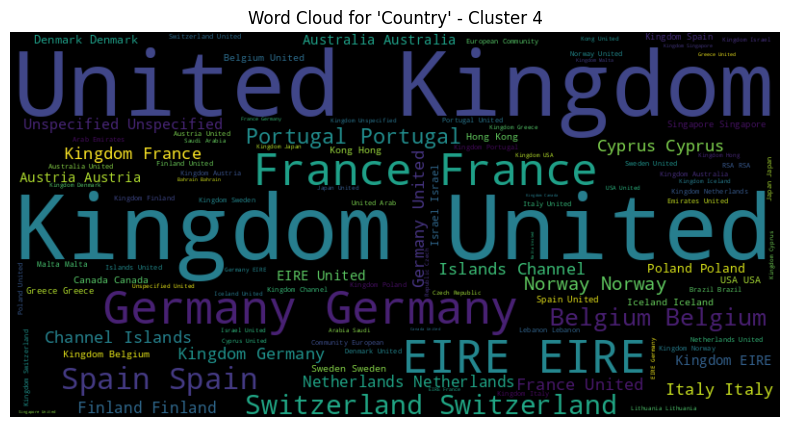


🔍 Cluster 5 — Word Clouds


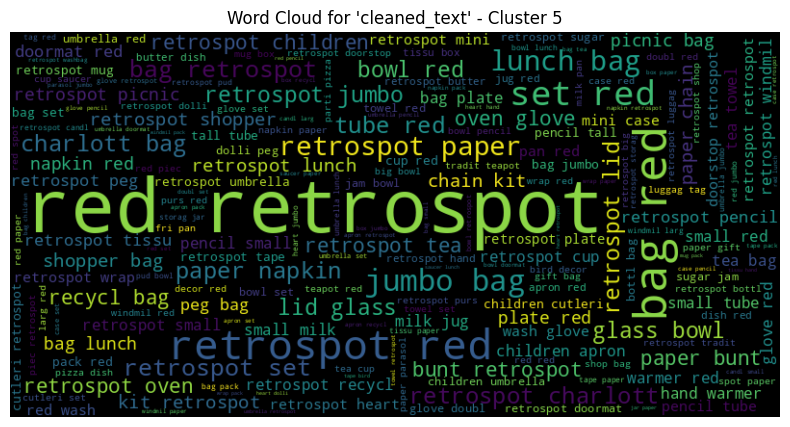

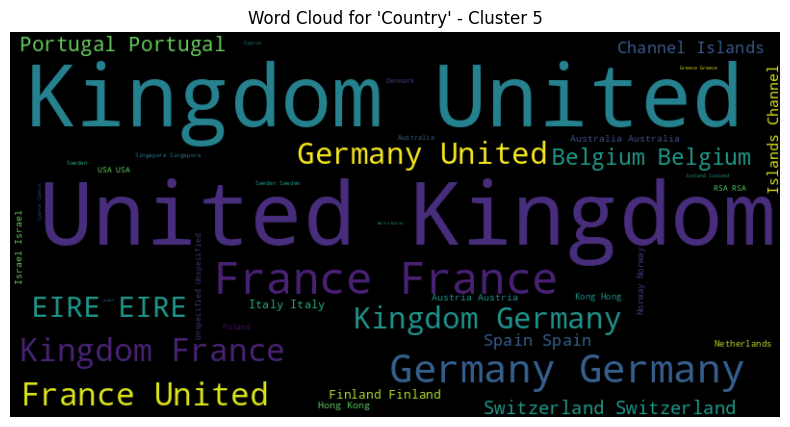


🔍 Cluster 6 — Word Clouds


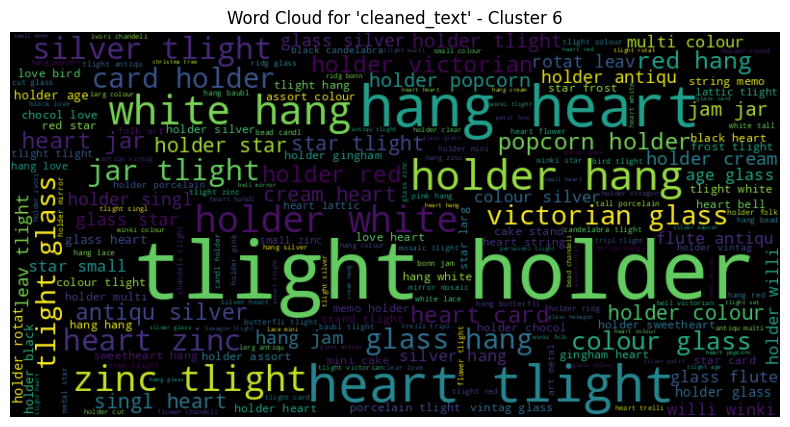

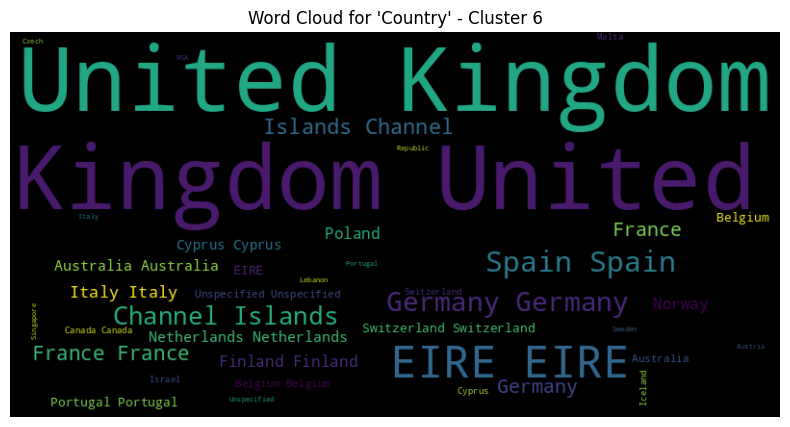

In [ ]:
#Analysis of clusters
generate_retail_wordclouds(df, cluster_col='clusters', text_cols=['cleaned_text','Country'])

Cluster 0 :
* Dominant products: "jumbo", "bag", "lunch", "vintage", "polkadot", "charlott", and "design".

* Dominant country: United Kingdom – most customers in this cluster are from the UK.

* Other notable countries: Germany, France, EIRE (Ireland), Portugal, and Belgium.

Cluster 1 :
* Dominant Product-Related Terms: The most frequently occurring terms are "set " , "cutter" , "cooki" (likely "cookie"), "tin " , "pantry," and "design".

* Dominant Countries: The most prominent words are United Kingdom,Germany,France, Spain,Belgium,Netherlands,Portugal,Ireland (EIRE), and Switzerland.

Cluster 2 :
* Dominant Products : Box / Boxes (Overwhelmingly dominant), Set, Trinket , Lunch , Snack ,
Cutlery , Felt , jewels.

Dominant Countries:United Kingdom
,Germany,France, Spain , Belgium , EIRE (Ireland)


Cluster 3 : This cluster seems to involve a mix of items related to cakes/baking, various types of cases and packs, and items with themes like fairies, retro designs, skulls, dinosaurs, and paisley patterns, often in pink.

This cluster primarily comprises customers from these Western European countries.

Cluster 4: Dominant Products:

Alarm Clock / Clock, Water Bottle, Sign, Metal, Decor, Heart, Hot Water (likely "hot water bottle"), Tin, Plaster, Drawer, Knob

Cluster 5: Dominant Products:Retropot / Retrospot (overwhelmingly dominant, indicates a specific design style), Red (dominant color), Bag, Paper, Set, Lunch, Jumbo (likely "jumbo bag" or "jumbo set"), Bowl, Lid, Glass

Cluster 6: Dominant Products :Holder (overwhelmingly dominant, indicates a primary product type), Tlight (likely "tea light" or "tealight" holder), Hang / Hanging, Heart, Glass, Silver, White, Jar, Victorian (suggests a design style),  Popcorn (likely "popcorn holder"), Card (likely "card holder"), Antiqu (likely "antique"), Zinc

# **Conclusion**

This project successfully segmented customers into seven meaningful clusters using product descriptions and countries. Each cluster represents distinct purchasing behaviors and preferences, revealing clear patterns in product types, design choices, and geographic demand. This segmentation provides valuable insight into how different customer groups interact with the business.

Business Strategy
Targeted Marketing Campaigns:
Create cluster-specific marketing content—for example, promote vintage bags and polkadot designs to Cluster 0 (UK-based), while advertising baking tools and kitchen sets to Cluster 1.

Region-Specific Promotions:
Leverage geographic insights to tailor offers by country—e.g., push decorative holders and jars to regions like France or Germany based on Cluster 6 trends.

Product Line Optimization:
Focus inventory and product development on high-demand categories per cluster, such as storage solutions for Cluster 2 or Retrospot-themed items for Cluster 5.

Personalized Customer Experience:
Use cluster labels to personalize website recommendations, email campaigns, and discount offers for returning customers.

International Expansion Planning:
Identify under-served but interested markets (e.g., Spain, Netherlands) from country distributions to guide regional growth strategies.

This data-driven strategy will enhance customer satisfaction, increase sales conversion rates, and improve operational efficiency across the business.